In [2]:
import numpy as np
import pandas as pd

data = np.load("predict_medals_data.npz")
X = pd.DataFrame(data["x_data"])
y = pd.DataFrame(data["y_data"])

In [3]:
X.head()

,0,1,2,3,4,5,6,7
0,0,0,1936,16,76,129,25,19
1,1,0,1948,25,71,136,23,17
2,2,0,1956,12,11,151,23,17
3,3,0,1960,16,97,150,23,17
4,4,0,1964,8,101,163,25,19


In [4]:
y.head()

,0,1,2,3,4
0,0,0,0,0,0
1,1,0,0,0,0
2,2,0,0,0,0
3,3,0,0,0,0
4,4,0,0,0,0


In [5]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

def custom_metric(y_true, y_pred):
    # Your custom metric calculation here
    return mean_squared_error(y_true, y_pred) + np.abs(y_pred[3] - (y_pred[2] + y_pred[1] + y_pred[0])).mean()

custom_scorer = make_scorer(custom_metric, greater_is_better=False) 

In [6]:
#training data on first 2000 rows, testing on rows 2000 to end
X.drop(X.columns[0], axis = 1, inplace = True)
#X_train = X.iloc[:2000]
#X_test = X.iloc[2000:]

In [7]:
#training data on first 2000 rows, testing on rows 2000 to end
y.drop(y.columns[0], axis = 1, inplace = True)
#y_train = y.iloc[:2000]
#y_test = y.iloc[2000:]

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 19)

In [20]:
#building our base model
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
#getting predictions after training
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

#getting MSE and r_2 for each output vector
for i in range(y_test.shape[1]):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"Output {i+1}: MSE = {mse:.3f}, R2 = {r2:.3f}")

Output 1: MSE = 6.685, R2 = 0.713
Output 2: MSE = 3.446, R2 = 0.816
Output 3: MSE = 3.801, R2 = 0.812
Output 4: MSE = 28.018, R2 = 0.839


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

y_test.columns = ["actual_1", "actual_2", "actual_3", "actual_4"]
y_test.reset_index(drop = True, inplace = True)

y_pred = pd.DataFrame(y_pred, columns = ["pred_1", "pred_2", "pred_3", "pred_4"])
y_pred.head()

,pred_1,pred_2,pred_3,pred_4
0,3.09,3.27,3.02,9.38
1,0.66,1.42,1.12,3.20
2,0.03,0.00,0.00,0.03
3,0.05,0.34,0.27,0.66
4,0.06,0.07,0.02,0.15


In [28]:
#combining actual data and predicted data into one dataframe for plotting 
plot_df = pd.concat([y_test, y_pred], axis=1)
plot_df.head()

,actual_1,actual_2,actual_3,actual_4,pred_1,pred_2,pred_3,pred_4
0,0,1,0,1,3.09,3.27,3.02,9.38
1,0,0,0,0,0.66,1.42,1.12,3.20
2,0,0,0,0,0.03,0.00,0.00,0.03
3,0,1,0,1,0.05,0.34,0.27,0.66
4,0,0,0,0,0.06,0.07,0.02,0.15


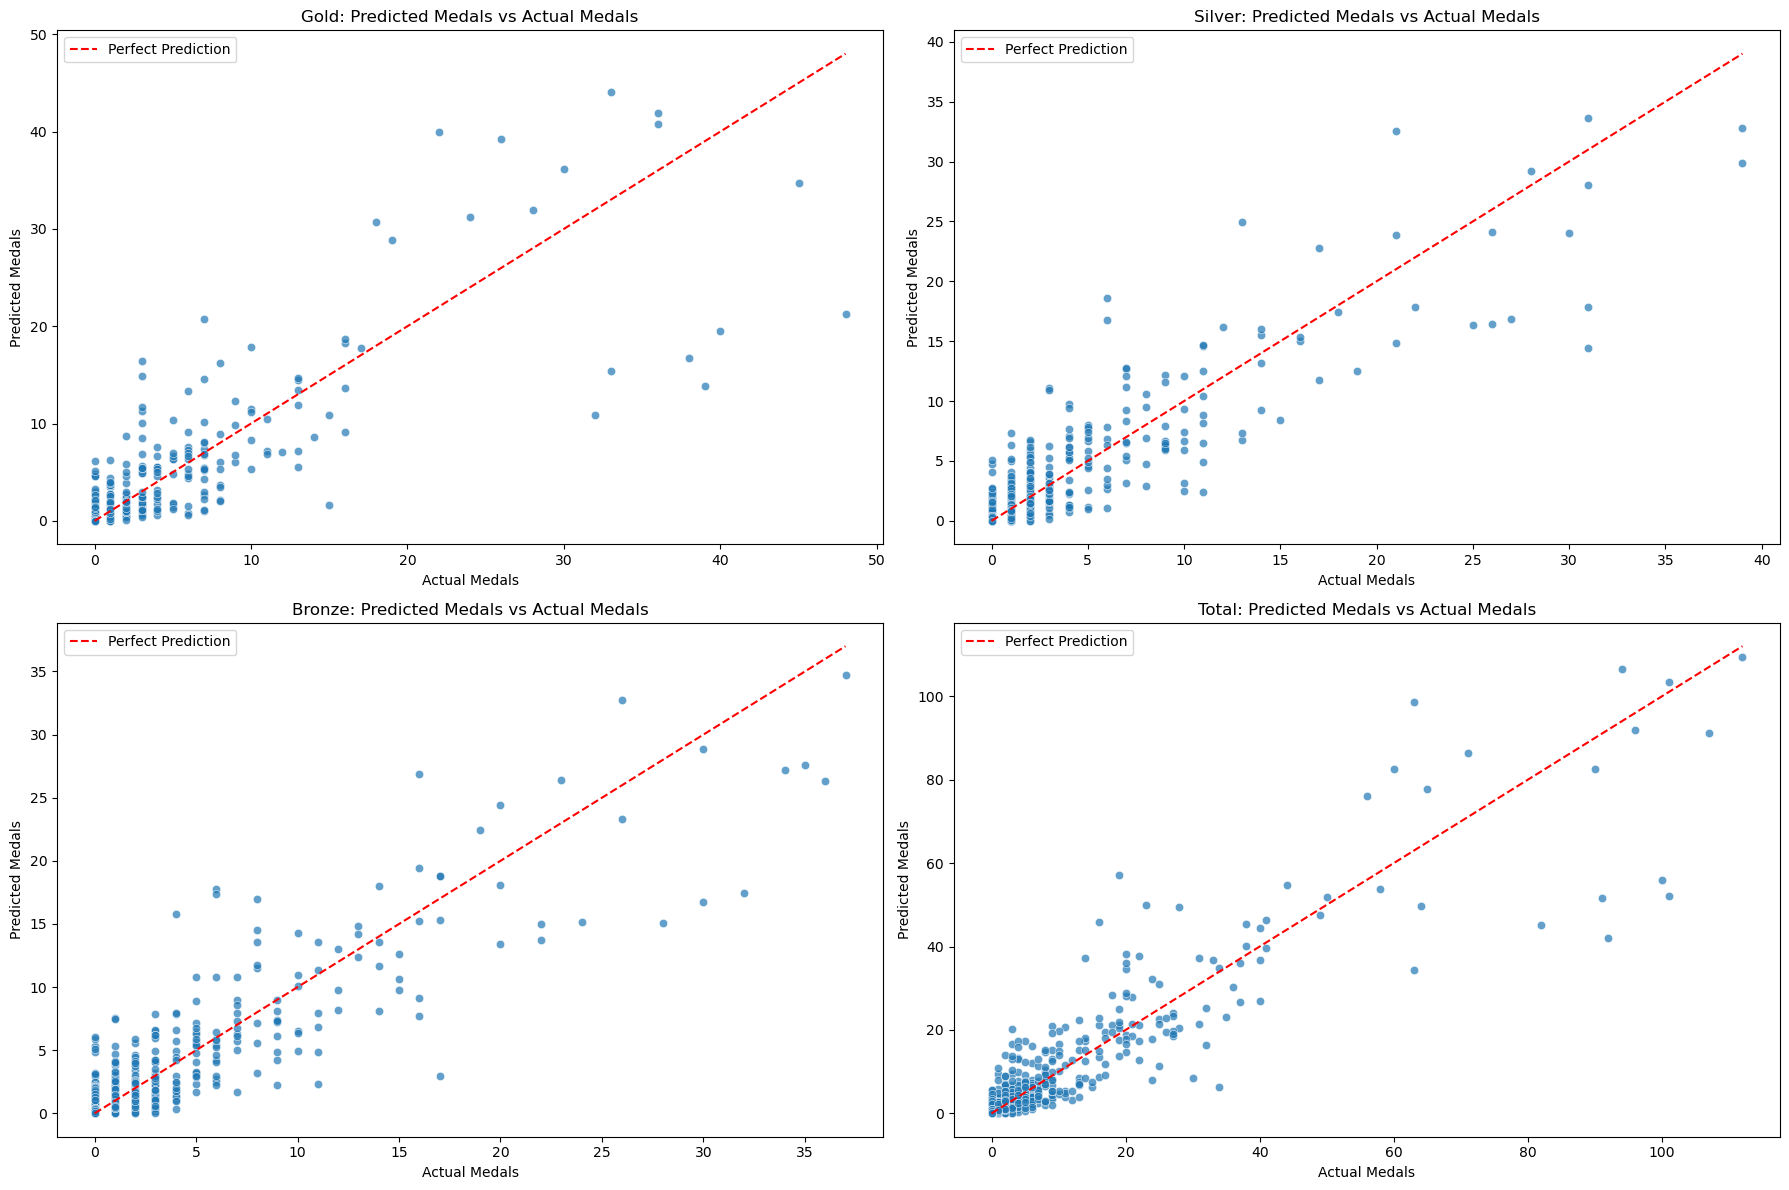

In [30]:
#plots evaluating our model

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

for i, col in enumerate([1, 2]):
    sns.scatterplot(
        data = plot_df,
        x = f'actual_{col}', 
        y = f'pred_{col}',  
        ax = axes[0, i],
        alpha = 0.7
    )
    axes[0, i].plot(
        [plot_df[f'actual_{col}'].min(), plot_df[f'actual_{col}'].max()],
        [plot_df[f'actual_{col}'].min(), plot_df[f'actual_{col}'].max()],
        color='red', linestyle='--', label='Perfect Prediction'
    )
    axes[0, i].set_xlabel('Actual Medals')
    axes[0, i].set_ylabel('Predicted Medals')
    axes[0, i].legend()
    
axes[0, 0].set_title("Gold: Predicted Medals vs Actual Medals")
axes[0, 1].set_title("Silver: Predicted Medals vs Actual Medals")
    
for i, col in enumerate([3, 4]):
    sns.scatterplot(
        data = plot_df,
        x = f'actual_{col}', 
        y = f'pred_{col}', 
        ax = axes[1, i],
        alpha = 0.7
    )
    axes[1, i].plot(
        [plot_df[f'actual_{col}'].min(), plot_df[f'actual_{col}'].max()],
        [plot_df[f'actual_{col}'].min(), plot_df[f'actual_{col}'].max()],
        color='red', linestyle='--', label='Perfect Prediction'
    )
    axes[1, i].set_xlabel('Actual Medals')
    axes[1, i].set_ylabel('Predicted Medals')
    axes[1, i].legend()
    
axes[1, 0].set_title("Bronze: Predicted Medals vs Actual Medals")
axes[1, 1].set_title("Total: Predicted Medals vs Actual Medals")
    
plt.tight_layout()

plt.savefig("default_figure.jpeg")

plt.show()

We're now going to optemize our model by tuning hyperparameters and normalizing our data.

In [33]:
#lets see if performance improves when we train our model on normalized data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [35]:
y_pred = model.predict(X_test_scaled)

In [37]:
#getting MSE and r_2 for each output vector
for i in range(y_test.shape[1]):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"Output {i+1}: MSE = {mse:.3f}, R2 = {r2:.3f}")

Output 1: MSE = 6.721, R2 = 0.711
Output 2: MSE = 3.436, R2 = 0.817
Output 3: MSE = 3.803, R2 = 0.812
Output 4: MSE = 28.123, R2 = 0.839


In [39]:
#seems like normalizing training data didn't help, lets optimize hyperparameters

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [3, 6, 9]
}

# perform Grid Search
grid_search_scaled = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, scoring = custom_scorer)
grid_search_scaled.fit(X_train_scaled, y_train)

# best parameters
print(grid_search_scaled.best_params_)

{'max_depth': 5, 'max_leaf_nodes': 6, 'min_samples_split': 10, 'n_estimators': 25}


C:\Users\green\anaconda3\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [41]:
optemized_model = RandomForestRegressor(n_estimators= 25, max_depth = 5, min_samples_split = 10, max_leaf_nodes = 6, random_state=42)
optemized_model.fit(X_train_scaled, y_train)
y_pred = optemized_model.predict(X_test_scaled)

#getting MSE and r_2 for each output vector
for i in range(y_test.shape[1]):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"Output {i+1}: MSE = {mse:.3f}, R2 = {r2:.3f}")

Output 1: MSE = 7.530, R2 = 0.677
Output 2: MSE = 4.008, R2 = 0.786
Output 3: MSE = 4.674, R2 = 0.768
Output 4: MSE = 35.157, R2 = 0.798


In [43]:
#getting MSE and r_2 for each output vector
for i in range(y_test.shape[1]):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"Output {i+1}: MSE = {mse:.3f}, R2 = {r2:.3f}")

Output 1: MSE = 7.530, R2 = 0.677
Output 2: MSE = 4.008, R2 = 0.786
Output 3: MSE = 4.674, R2 = 0.768
Output 4: MSE = 35.157, R2 = 0.798


In [45]:
y_test.columns = ["actual_1", "actual_2", "actual_3", "actual_4"]
y_test.reset_index(drop = True, inplace = True)

y_pred = pd.DataFrame(y_pred, columns = ["pred_1", "pred_2", "pred_3", "pred_4"])

In [47]:
#combining actual data and predicted data into one dataframe for plotting 
plot_df = pd.concat([y_test, y_pred], axis=1)
plot_df.head()

,actual_1,actual_2,actual_3,actual_4,pred_1,pred_2,pred_3,pred_4
0,0,1,0,1,1.826810,2.103375,2.412646,6.342831
1,0,0,0,0,0.251792,0.302382,0.378823,0.932997
2,0,0,0,0,0.214345,0.252874,0.319724,0.786944
3,0,1,0,1,0.374784,0.457054,0.565496,1.397334
4,0,0,0,0,0.214345,0.252874,0.319724,0.786944


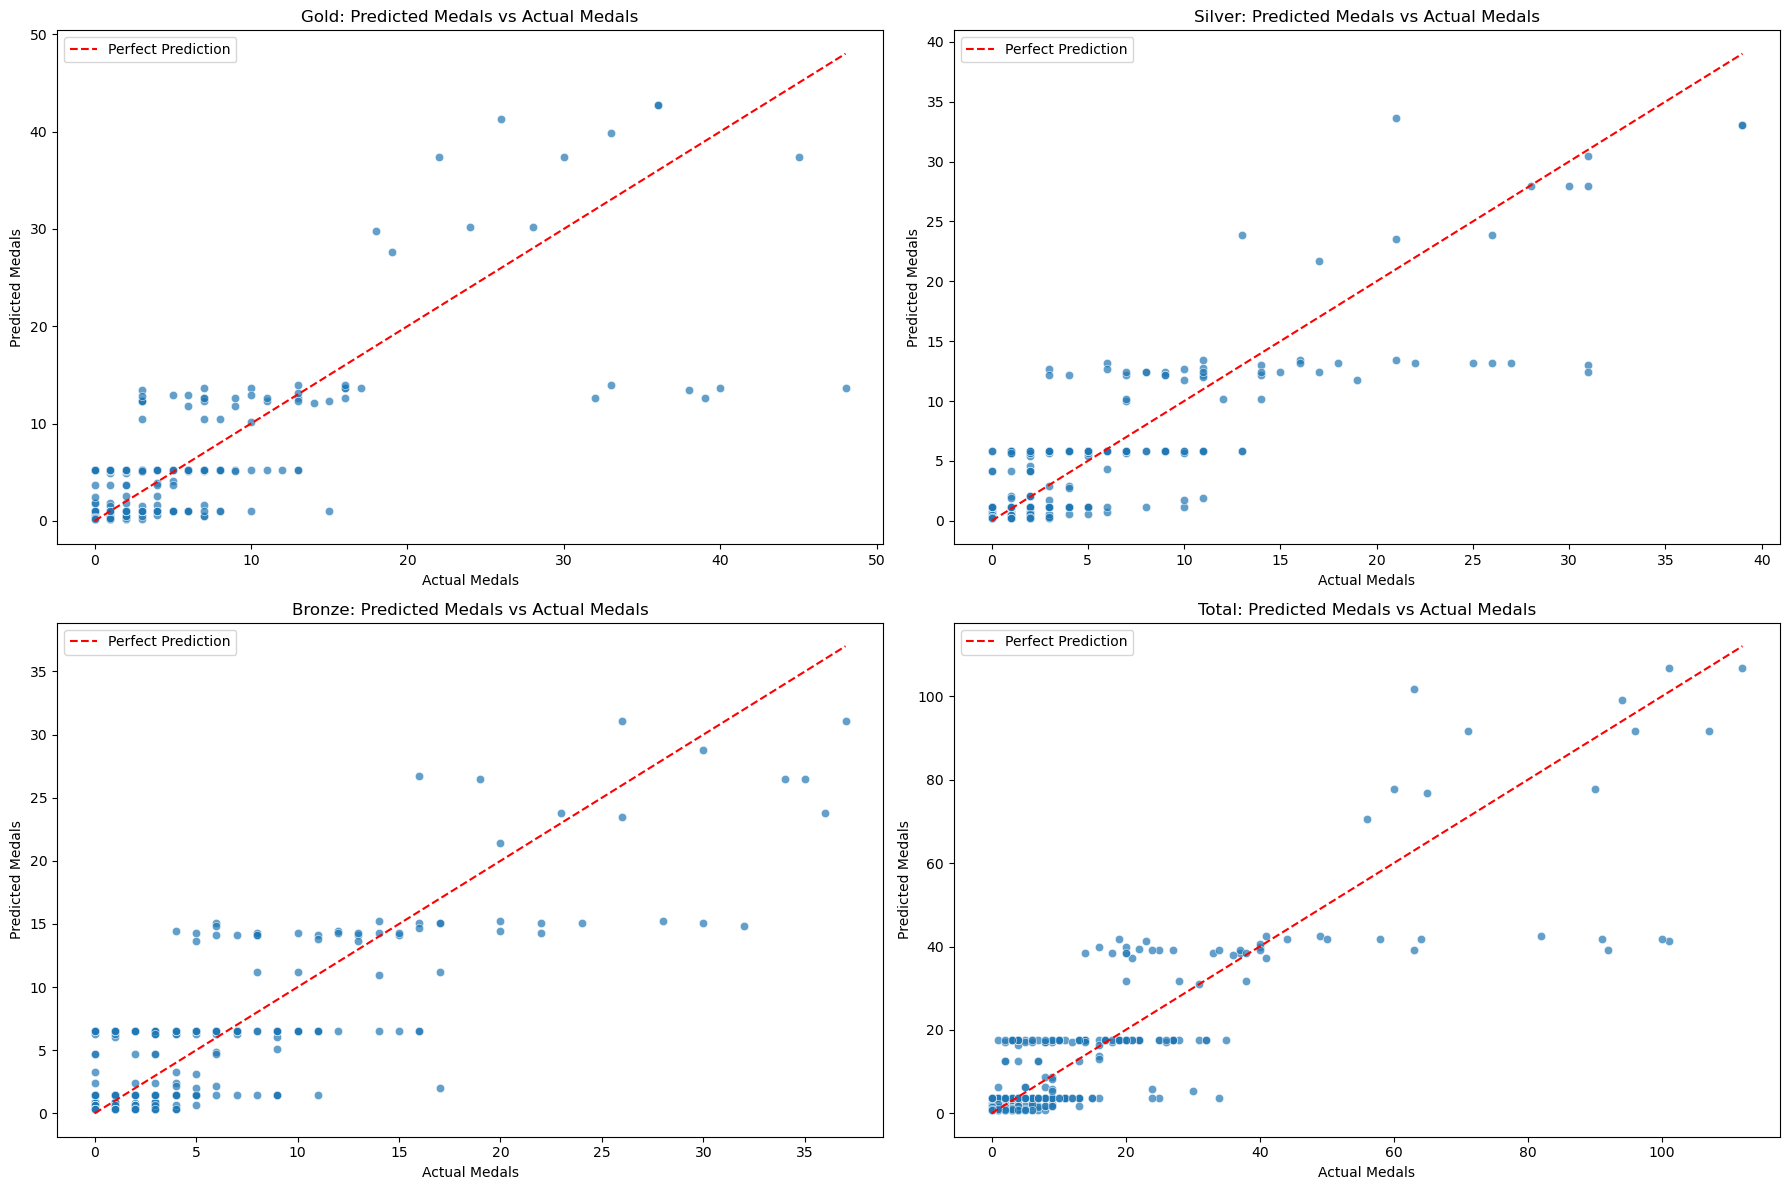

In [49]:
#plots evaluating our model

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

for i, col in enumerate([1, 2]):
    sns.scatterplot(
        data = plot_df,
        x = f'actual_{col}', 
        y = f'pred_{col}',  
        ax = axes[0, i],
        alpha = 0.7
    )
    axes[0, i].plot(
        [plot_df[f'actual_{col}'].min(), plot_df[f'actual_{col}'].max()],
        [plot_df[f'actual_{col}'].min(), plot_df[f'actual_{col}'].max()],
        color='red', linestyle='--', label='Perfect Prediction'
    )
    axes[0, i].set_xlabel('Actual Medals')
    axes[0, i].set_ylabel('Predicted Medals')
    axes[0, i].legend()
    
axes[0, 0].set_title("Gold: Predicted Medals vs Actual Medals")
axes[0, 1].set_title("Silver: Predicted Medals vs Actual Medals")
    
for i, col in enumerate([3, 4]):
    sns.scatterplot(
        data = plot_df,
        x = f'actual_{col}', 
        y = f'pred_{col}', 
        ax = axes[1, i],
        alpha = 0.7
    )
    axes[1, i].plot(
        [plot_df[f'actual_{col}'].min(), plot_df[f'actual_{col}'].max()],
        [plot_df[f'actual_{col}'].min(), plot_df[f'actual_{col}'].max()],
        color='red', linestyle='--', label='Perfect Prediction'
    )
    axes[1, i].set_xlabel('Actual Medals')
    axes[1, i].set_ylabel('Predicted Medals')
    axes[1, i].legend()
    
axes[1, 0].set_title("Bronze: Predicted Medals vs Actual Medals")
axes[1, 1].set_title("Total: Predicted Medals vs Actual Medals")
                     
plt.tight_layout()

plt.savefig("optimized_figure.jpeg")

plt.show()

In [51]:
#lets do a grid search for a model trained on the non-normalized training data

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [3, 6, 9]
}

# perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid)
grid_search.fit(X_train, y_train)

# best parameters
print(grid_search.best_params_)

C:\Users\green\anaconda3\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 5, 'n_estimators': 150}


In [52]:
final_model = RandomForestRegressor(max_depth = 5, max_leaf_nodes = 9, min_samples_split = 10, n_estimators = 50)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [55]:
#getting MSE and r_2 for each output vector
for i in range(y_test.shape[1]):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"Output {i+1}: MSE = {mse:.3f}, R2 = {r2:.3f}")

Output 1: MSE = 6.564, R2 = 0.718
Output 2: MSE = 3.300, R2 = 0.824
Output 3: MSE = 4.012, R2 = 0.801
Output 4: MSE = 28.330, R2 = 0.837


In [57]:
y_test.columns = ["actual_1", "actual_2", "actual_3", "actual_4"]
y_test.reset_index(drop = True, inplace = True)

y_pred = pd.DataFrame(y_pred, columns = ["pred_1", "pred_2", "pred_3", "pred_4"])

In [58]:
#combining actual data and predicted data into one dataframe for plotting 
plot_df = pd.concat([y_test, y_pred], axis=1)
plot_df.head()

,actual_1,actual_2,actual_3,actual_4,pred_1,pred_2,pred_3,pred_4
0,0,1,0,1,2.353563,2.670369,2.960717,7.984649
1,0,0,0,0,0.164289,0.202967,0.264251,0.631508
2,0,0,0,0,0.130701,0.161580,0.210638,0.502919
3,0,1,0,1,0.246096,0.295405,0.390223,0.931724
4,0,0,0,0,0.130701,0.161580,0.210638,0.502919


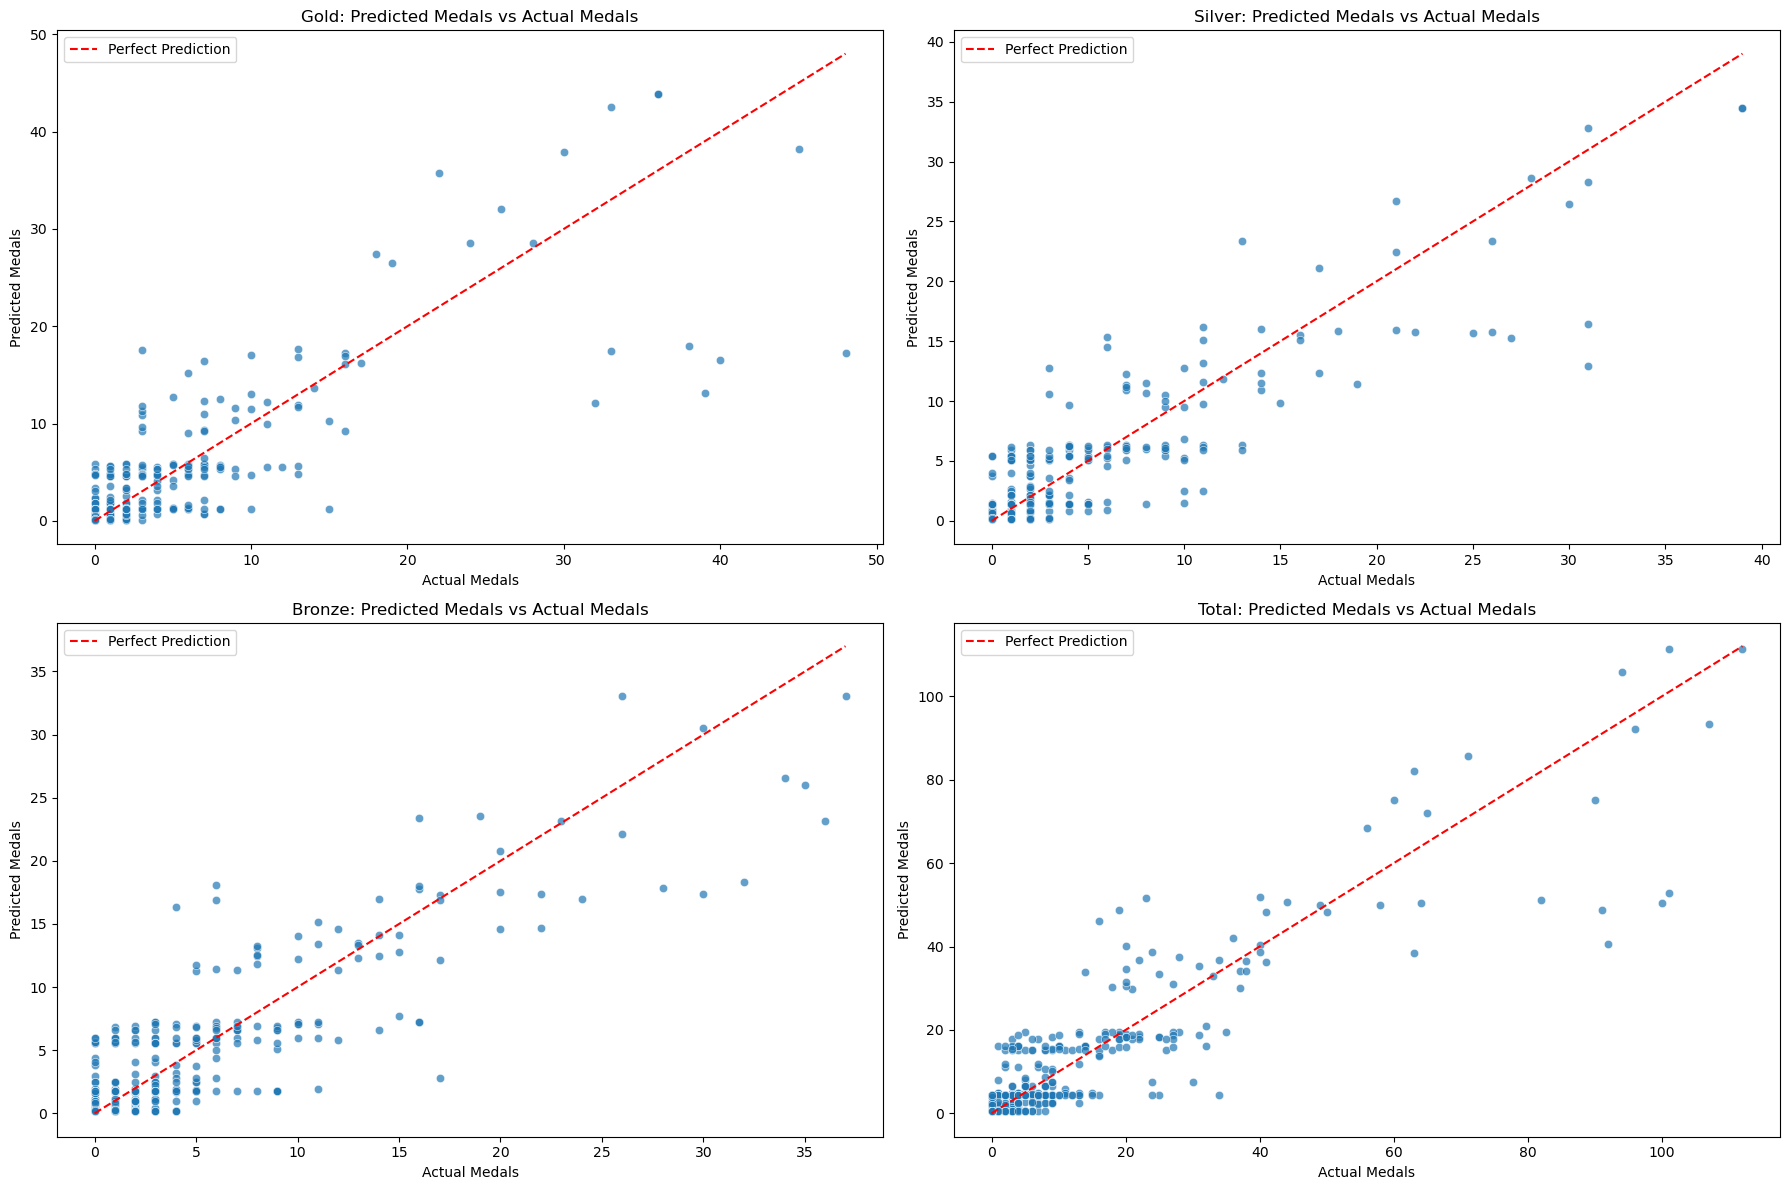

In [61]:
#plots evaluating our model

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

for i, col in enumerate([1, 2]):
    sns.scatterplot(
        data = plot_df,
        x = f'actual_{col}', 
        y = f'pred_{col}',  
        ax = axes[0, i],
        alpha = 0.7
    )
    axes[0, i].plot(
        [plot_df[f'actual_{col}'].min(), plot_df[f'actual_{col}'].max()],
        [plot_df[f'actual_{col}'].min(), plot_df[f'actual_{col}'].max()],
        color='red', linestyle='--', label='Perfect Prediction'
    )
    axes[0, i].set_xlabel('Actual Medals')
    axes[0, i].set_ylabel('Predicted Medals')
    axes[0, i].legend()
    
axes[0, 0].set_title("Gold: Predicted Medals vs Actual Medals")
axes[0, 1].set_title("Silver: Predicted Medals vs Actual Medals")
    
for i, col in enumerate([3, 4]):
    sns.scatterplot(
        data = plot_df,
        x = f'actual_{col}', 
        y = f'pred_{col}', 
        ax = axes[1, i],
        alpha = 0.7
    )
    axes[1, i].plot(
        [plot_df[f'actual_{col}'].min(), plot_df[f'actual_{col}'].max()],
        [plot_df[f'actual_{col}'].min(), plot_df[f'actual_{col}'].max()],
        color='red', linestyle='--', label='Perfect Prediction'
    )
    axes[1, i].set_xlabel('Actual Medals')
    axes[1, i].set_ylabel('Predicted Medals')
    axes[1, i].legend()
    
axes[1, 0].set_title("Bronze: Predicted Medals vs Actual Medals")
axes[1, 1].set_title("Total: Predicted Medals vs Actual Medals")
                     
plt.tight_layout()
plt.show()

In [62]:
len(X)

3083